In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/users/memdp/PYTHON_CODE/Datasets')

df = pd.read_csv('6 class csv.csv')

print('The shape of the dataset:', df.shape)

The shape of the dataset: (240, 7)


In [2]:
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [3]:
# Temperature for Brown Dwarfs
brown_dwarfs = df['Temperature (K)'].loc[df['Star type'] == 0]

print('Temperature for Brown Dwarfs data statistics:\n', brown_dwarfs.describe())
# Temperature for Red Dwarfs
red_dwarfs = df['Temperature (K)'].loc[df['Star type'] == 1]

print('\nTemperature for Brown Dwarfs data statistics:\n', red_dwarfs.describe())

# Temperature for White Dwarfs
white_dwarfs = df['Temperature (K)'].loc[df['Star type'] == 2]

print('\nTemperature for White Dwarfs data statistics:\n', white_dwarfs.describe())

Temperature for Brown Dwarfs data statistics:
 count      40.000000
mean     2997.950000
std       332.276295
min      1939.000000
25%      2812.750000
50%      2935.000000
75%      3242.500000
max      3531.000000
Name: Temperature (K), dtype: float64

Temperature for Brown Dwarfs data statistics:
 count      40.000000
mean     3283.825000
std       269.637258
min      2621.000000
25%      3132.750000
50%      3314.000000
75%      3527.500000
max      3692.000000
Name: Temperature (K), dtype: float64

Temperature for White Dwarfs data statistics:
 count       40.000000
mean     13931.450000
std       4957.655189
min       7100.000000
25%       9488.750000
50%      13380.000000
75%      17380.000000
max      25000.000000
Name: Temperature (K), dtype: float64


In [4]:
# Temperature for Main Sequence
main_seq = df['Temperature (K)'].loc[df['Star type'] == 3]

print('\nTemperature for Main Sequence data statistics:\n', main_seq.describe())

# Temperature for Supergiant
supergiant = df['Temperature (K)'].loc[df['Star type'] == 4]

print('\nTemperature for Supergiant data statistics:\n', supergiant.describe())

# Temperature for Hypergiant
hypergiant = df['Temperature (K)'].loc[df['Star type'] == 5]

print('\nTemperature for Hypergiant data statistics:\n', hypergiant.describe())


Temperature for Main Sequence data statistics:
 count       40.000000
mean     16018.000000
std      10661.234972
min       4077.000000
25%       7479.250000
50%      12560.500000
75%      23030.000000
max      39000.000000
Name: Temperature (K), dtype: float64

Temperature for Supergiant data statistics:
 count       40.000000
mean     15347.850000
std      10086.784628
min       3008.000000
25%       6899.500000
50%      12821.000000
75%      23181.250000
max      40000.000000
Name: Temperature (K), dtype: float64

Temperature for Hypergiant data statistics:
 count       40.000000
mean     11405.700000
std      11816.991886
min       3399.000000
25%       3603.750000
50%       3766.000000
75%      18976.000000
max      38940.000000
Name: Temperature (K), dtype: float64


In [5]:
# Locating the index where the max and min values of Temperature
# for each star type
print('Brown Dwarf -- (Min index, Max index):', brown_dwarfs.idxmin(), brown_dwarfs.idxmax())
print('Red Dwarf -- (Min index, Max index):', red_dwarfs.idxmin(), red_dwarfs.idxmax())
print('White Dwarf -- (Min index, Max index):', white_dwarfs.idxmin(), white_dwarfs.idxmax())
print('Main Sequence -- (Min index, Max index):', main_seq.idxmin(), main_seq.idxmax())
print('Supergiant -- (Min index, Max index):', supergiant.idxmin(), supergiant.idxmax())
print('Hypergiant -- (Min index, Max index):', hypergiant.idxmin(), hypergiant.idxmax())

Brown Dwarf -- (Min index, Max index): 4 121
Red Dwarf -- (Min index, Max index): 78 17
White Dwarf -- (Min index, Max index): 80 20
Main Sequence -- (Min index, Max index): 92 30
Supergiant -- (Min index, Max index): 44 101
Hypergiant -- (Min index, Max index): 113 235


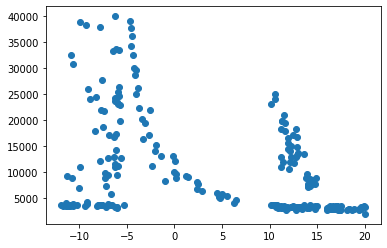

In [6]:
plt.scatter(df['Absolute magnitude(Mv)'], df['Temperature (K)'])

Text(0.5, 1.0, 'Temperature vs Abs. Magnitude')

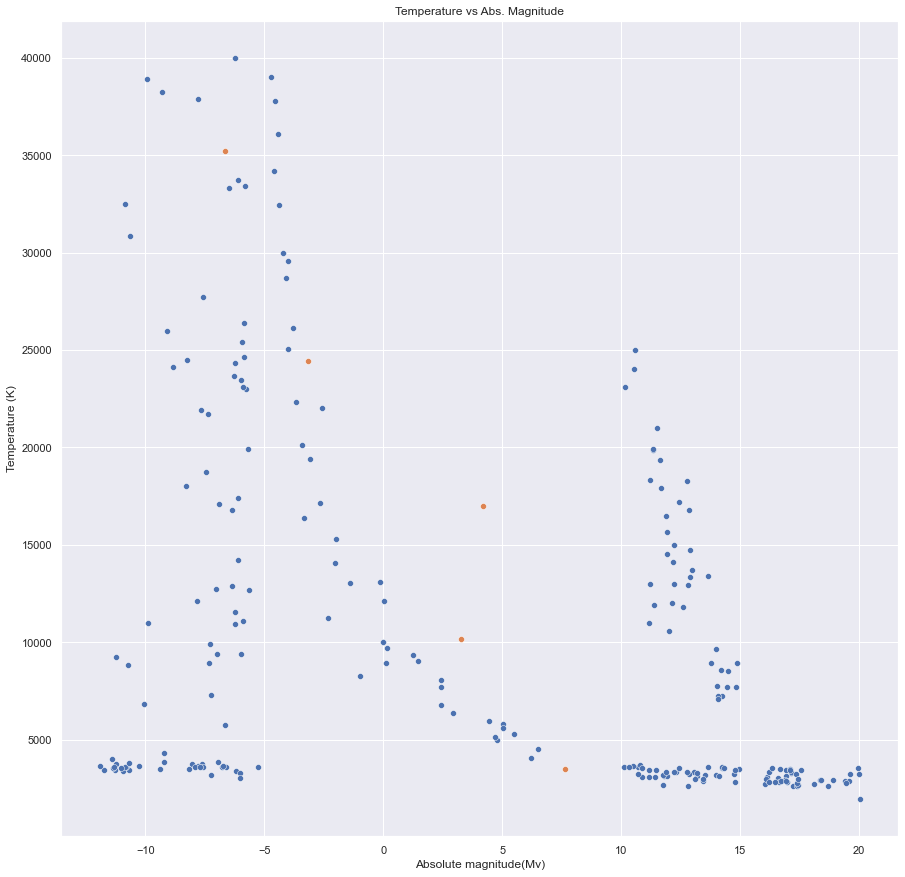

In [7]:
X = df[['Absolute magnitude(Mv)', 'Temperature (K)']]

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

centroids = kmeans.cluster_centers_

sns.set(rc = {'figure.figsize':(15,15)})
ax = sns.scatterplot(x=df['Absolute magnitude(Mv)'], y=df['Temperature (K)'])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1])
ax.set_title('Temperature vs Abs. Magnitude')

In [8]:
# Check the silhouette scores
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)

print('For n_clusters =', 5,
      'The average silhouette_score is :', silhouette_avg)
# This silhouette score is relatively close to 1
# Therefore these are dense, well-seperated clusters

For n_clusters = 5 The average silhouette_score is : 0.7146818062383213
